# Stage 3:

# 1) Divide data into train & test samples. (70-30 split)

In [25]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
#reading the dataset on which i will perform the xgboost model
df = pd.read_csv('PercentGrowth.csv',usecols=['Unnamed: 5','Unnamed: 6'])
df.head(5)

,Unnamed: 5,Unnamed: 6
0,C1) Funding FY2008,C2) Funding FY2009
1,5.24,7.19
2,14,14
3,5,5
4,4.57,11.79


In [73]:
#reading the label
Y = pd.read_csv('PercentGrowth.csv',usecols=['Tags'])


In [87]:
#saving the label in alist
label=[]
for i in range(1,len(Y['Tags'])):
    label.append(int(Y['Tags'][i]))

In [88]:
#checking unique values of label
set(label)

{0, 1}

we will apply XGboost to predict the tags of the data prepared in stage 1

In [89]:
X=df.iloc[1:]
X=X.astype(float)

In [92]:
#using scikit learn's train_test_split function splitting the data into 70-30
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.3)

# 2) Select features & build xgboost model. You will be judged on roc_auc_score on test sample.

I will be taking the Funding 2008 and funding 2009 as features for prediction of tags. The model will learn the pattern of growth and will predict weather the funding growth will be positive or negative.

In [93]:
#importing necessary libraries for XGboost algorithm
from xgboost import XGBClassifier
from matplotlib import pyplot
#create the model
model = XGBClassifier()
#fit the model with training data and evaluate with auc eval_metric.
model.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='auc')


[0]	validation_0-auc:0.79699	validation_1-auc:0.797138
[1]	validation_0-auc:0.80236	validation_1-auc:0.825337
[2]	validation_0-auc:0.810203	validation_1-auc:0.819865
[3]	validation_0-auc:0.810203	validation_1-auc:0.819865
[4]	validation_0-auc:0.810203	validation_1-auc:0.819865
[5]	validation_0-auc:0.823982	validation_1-auc:0.819865
[6]	validation_0-auc:0.839952	validation_1-auc:0.849747
[7]	validation_0-auc:0.837832	validation_1-auc:0.849747
[8]	validation_0-auc:0.839952	validation_1-auc:0.849747
[9]	validation_0-auc:0.846665	validation_1-auc:0.86995
[10]	validation_0-auc:0.843838	validation_1-auc:0.858165
[11]	validation_0-auc:0.84299	validation_1-auc:0.858165
[12]	validation_0-auc:0.84299	validation_1-auc:0.858165
[13]	validation_0-auc:0.849774	validation_1-auc:0.843013
[14]	validation_0-auc:0.872598	validation_1-auc:0.869529
[15]	validation_0-auc:0.88037	validation_1-auc:0.869529
[16]	validation_0-auc:0.891817	validation_1-auc:0.872054
[17]	validation_0-auc:0.893655	validation_1-auc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

[ 0.58095241  0.41904762]


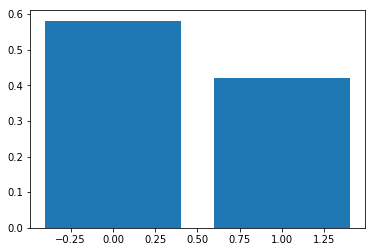

In [94]:
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [95]:
y_pred = model.predict(X_test)# predicting the model using model.predict function

In [101]:
accuracy = roc_auc_score(y_test,y_pred ) # calculating the accuracy score.
print("roc_auc_score is: %.2f%%" % (accuracy))

roc_auc_score is: 0.87%


# 3) Write testcases on all user defined functions using pytest framework.

Writing test cases for user defined function calculateGrowth() and tagging()

In [107]:
def calculateGrowth(df):
    targetlist=[]
    for i in range(1,len(df)):
        if(df['Unnamed: 5'][i]==0):
            targetlist.append(100)
        else:
            targetlist.append(((df['Unnamed: 6'][i]- df['Unnamed: 5'][i])/df['Unnamed: 5'][i])*100)
    return targetlist

In [108]:
def tagging(df):
    targetVar=[]
    for i in range(1,len(df)):
        if(df['Growth'][i]>0):
            targetVar.append(1)
        else:
            targetVar.append(0)
    return targetVar

These testcases are to identify weather there has been a positive growth or not.

In [104]:
import pytest

In [105]:
def calculateGrowthTest(df):
    assert calculateGrowth(df)>0

In [106]:
def taggingTest(df):
    assert tagging(df)==1